In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mbeml.constants import TargetProperty

In [2]:
plt.style.use("mbeml.mbeml")

In [3]:
data_dir = Path("../../data/")

names = [
    "training_data.csv",
    "validation_data.csv",
    "composition_test_data.csv",
    "ligand_test_data.csv",
]
data_sets = [pd.read_csv(data_dir / name) for name in names]

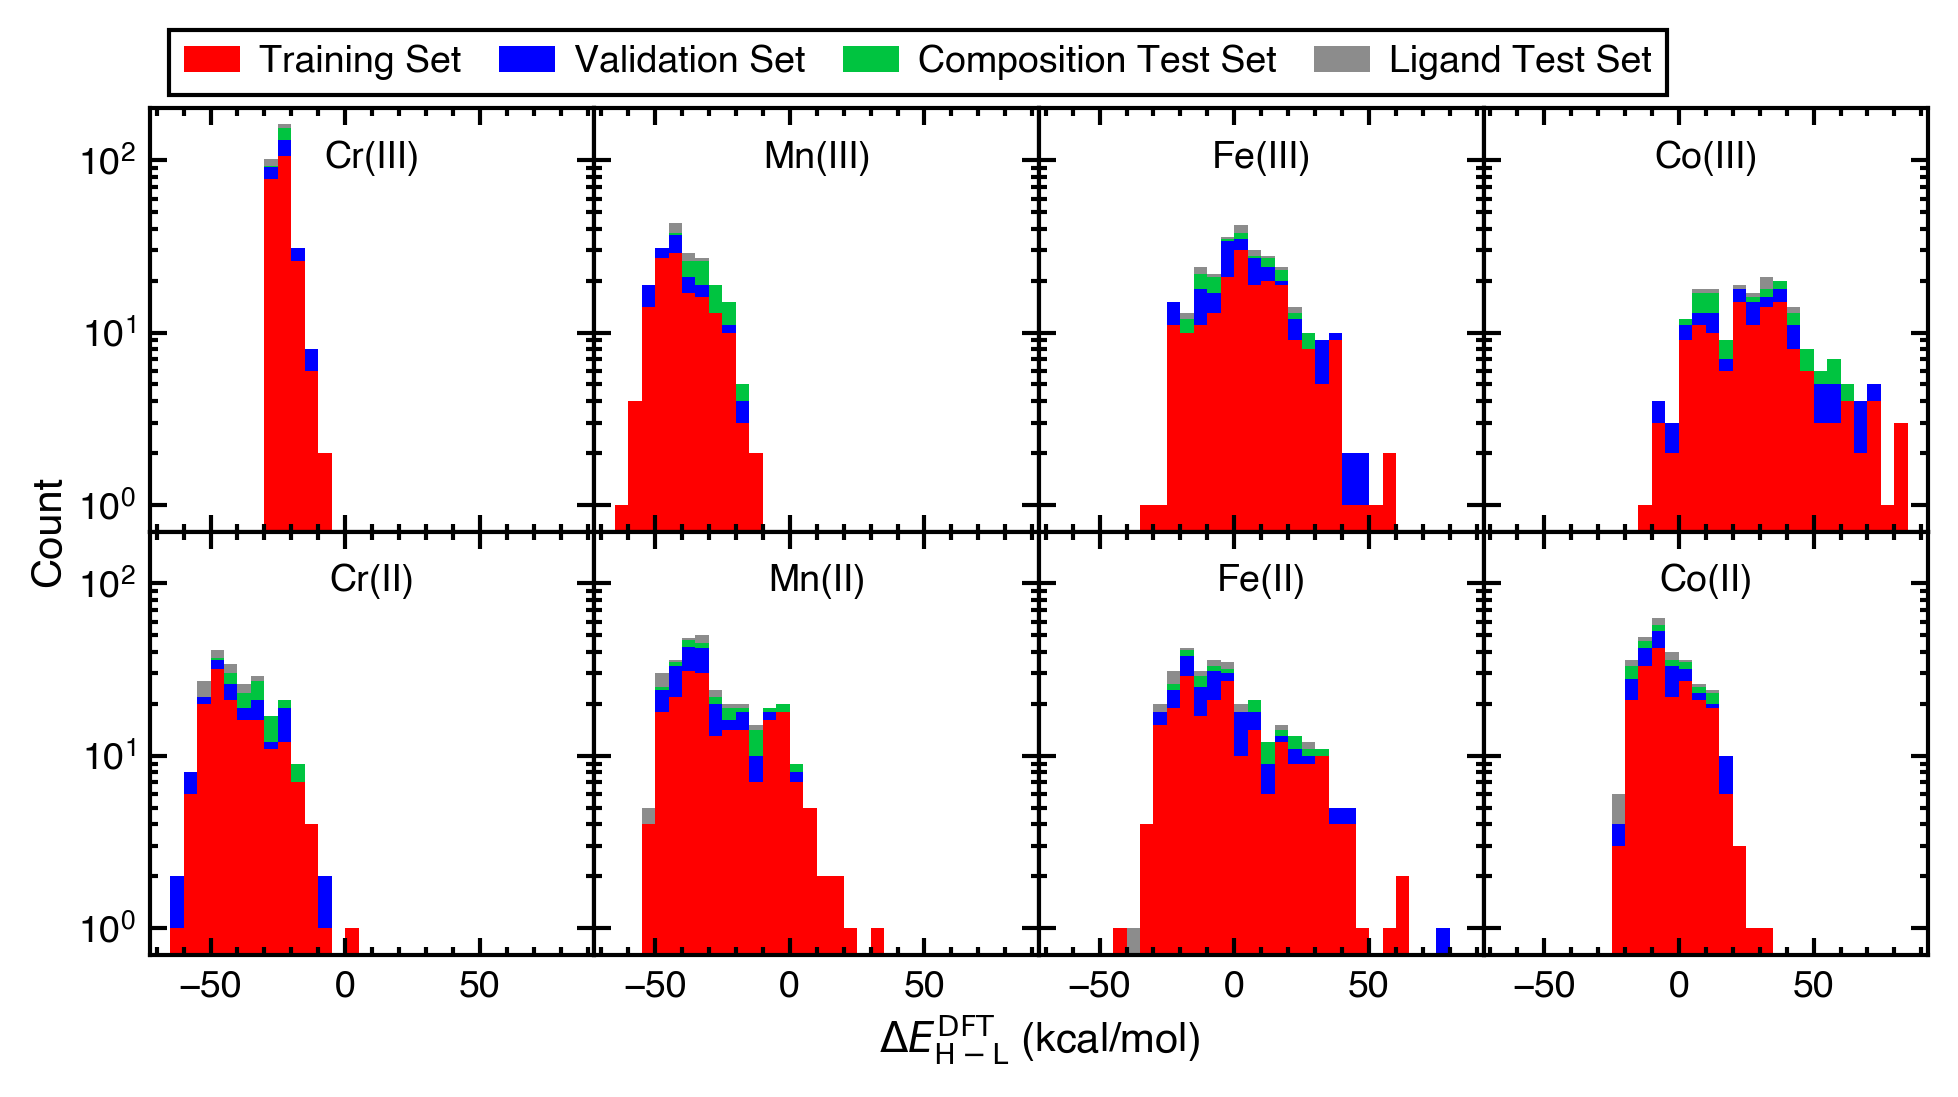

In [4]:
unique_cores = ["cr3", "cr2", "mn3", "mn2", "fe3", "fe2", "co3", "co2"]
roman_numerals = {"2": "II", "3": "III"}
gridspec_kw = {
    "left": 0.08,
    "right": 0.97,
    "top": 0.90,
    "bottom": 0.13,
    "hspace": 0.0,
    "wspace": 0.0,
}
fig, axes = plt.subplots(
    figsize=(6.66, 1.1 * 3.33),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey=True,
    gridspec_kw=gridspec_kw,
)

bins = np.linspace(-65, 85, 31)

for core, ax in zip(unique_cores, axes.T.flatten()):
    bottoms = np.zeros(len(bins) - 1)
    for df in data_sets:
        cores = df[["metal", "ox"]].apply(lambda x: f"{x.metal}{x.ox}", axis=1).values
        mask = cores == core
        y = df[mask][TargetProperty.SSE.full_name()]
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms)
        bottoms += counts
    ax.text(
        10,
        130,
        f"{core[:2].capitalize()}({roman_numerals[core[-1]]})",
        ha="center",
        va="top",
        fontsize=9,
    )
    ax.set_yscale("log")
    ax.set_ylim(0.7, 200)
    ax.set_yticks(
        list(range(2, 10)) + [10 * i for i in range(2, 10)],
        minor=True,
    )
    ax.set_xticks(10 * np.arange(-7, 10), minor=True)

# Labels
fig.text(
    gridspec_kw["left"] + 0.5 * (gridspec_kw["right"] - gridspec_kw["left"]),
    gridspec_kw["bottom"] - 0.09,
    "$\Delta E^\mathrm{DFT}_{\mathrm{H}-\mathrm{L}}$ (kcal/mol)",
    ha="center",
)
fig.text(
    0.02,
    gridspec_kw["bottom"] + 0.5 * (gridspec_kw["top"] - gridspec_kw["bottom"]),
    "Count",
    rotation=90,
    va="center",
)

# Legend
ax = axes[0, 0]
for label, color in [
    ("Training Set", "C0"),
    ("Validation Set", "C1"),
    ("Composition Test Set", "C2"),
    ("Ligand Test Set", "C3"),
]:
    ax.hist([], label=label, color=color)
ax.legend(loc="upper left", bbox_to_anchor=(0.0, 1.23), ncols=4)
fig.savefig("plots/histogram_sse.pdf")